# Projeto de Aprendizado de Máquina

### 2º semestre de 2022

#### Grupo formado por:
        Ana Clara Loponi - 220073
        Ana Clara Brandão - 220069
        Heitor Bernardes - 220052
        Lorraine Casseano - 220036
    
### Preparação dos Dados: Tratamento de Dados e Normalização 

<ht> Idealmente, o projeto consiste em treinar uma máquina para prever possíveis surtos de dengue. Inicialmente, vamos usar dados coletados em Campinas, São Paulo, dos anos de 1998 à 2014 p/ mês, referentes ao número de casos confirmados, volume de chuva (em mm), temperatura mínima, temperatura máxima e temperatura média. 

In [2]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

In [3]:
dados1 = pd.read_excel("dengue_dataset.xlsx") # Lendos os dados.

dados1.dtypes # Este comando informa quais os tipos de dados o dataframe contém.

data                    datetime64[ns]
casos-confirmados                int64
chuva                          float64
temperatura-media              float64
temperatura-mininima           float64
temperatura-maxima             float64
dtype: object

### Testando as formas de normalização

In [4]:
#padrão - teste
dados2 = dados1.copy()

media_chuva = dados2['chuva'].mean()
desvio_padrao_chuva = dados2['chuva'].std()

dados2['chuva_zscore'] = (dados2['chuva'] - media_chuva) / desvio_padrao_chuva

#print(dados2)

In [5]:
#maximo_absoluto
dados3 = dados1.copy()

maximo_absoluto = dados3['chuva'].max()

dados3['chuva_max_abs'] = dados3['chuva'] / maximo_absoluto

#print(dados3)

### Normaliação por Máximo e Mínimo Absoluto

In [6]:
#maximo_e_minimo_absoluto
#chuva
dados4 = dados1.copy()

maximo_chuva = dados4['chuva'].max()
minimo_chuva = dados4['chuva'].min()

dados4['chuva_min_max_abs'] = (dados4['chuva'] - minimo_chuva) / (maximo_chuva - minimo_chuva)

print(dados4)

          data  casos-confirmados  chuva  temperatura-media  \
0   1998-01-01                237  179.2               25.7   
1   1998-02-01                331  226.3               25.1   
2   1998-03-01                562  149.1               24.8   
3   1998-04-01                187   46.4               22.7   
4   1998-05-01                 32   88.3               19.2   
..         ...                ...    ...                ...   
199 2014-08-01                 55   12.2               20.6   
200 2014-09-01                 40   69.2               23.0   
201 2014-10-01                 40   15.6               24.7   
202 2014-11-01                 57  154.8               25.0   
203 2014-12-01                 37  232.8               24.9   

     temperatura-mininima  temperatura-maxima  chuva_min_max_abs  
0                    20.2                28.1           0.394690  
1                    20.0                28.0           0.498894  
2                    22.4                2

In [7]:
#temperatura
dados5 = dados1.copy()

maximo_temp_med = dados5['temperatura-media'].max()
minimo_temp_med = dados5['temperatura-media'].min()

dados5['temp-med_min_max_abs'] = (dados5['temperatura-media'] - minimo_temp_med) / (maximo_temp_med - minimo_temp_med)

print(dados5)

          data  casos-confirmados  chuva  temperatura-media  \
0   1998-01-01                237  179.2               25.7   
1   1998-02-01                331  226.3               25.1   
2   1998-03-01                562  149.1               24.8   
3   1998-04-01                187   46.4               22.7   
4   1998-05-01                 32   88.3               19.2   
..         ...                ...    ...                ...   
199 2014-08-01                 55   12.2               20.6   
200 2014-09-01                 40   69.2               23.0   
201 2014-10-01                 40   15.6               24.7   
202 2014-11-01                 57  154.8               25.0   
203 2014-12-01                 37  232.8               24.9   

     temperatura-mininima  temperatura-maxima  temp-med_min_max_abs  
0                    20.2                28.1              0.861111  
1                    20.0                28.0              0.805556  
2                    22.4        

In [8]:
#temperatura_mínima
dados6 = dados1.copy()

maximo_temp_min = dados6['temperatura-mininima'].max()
minimo_temp_min = dados6['temperatura-mininima'].min()

dados6['temp-min_min_max_abs'] = (dados6['temperatura-mininima'] - minimo_temp_min) / (maximo_temp_min - minimo_temp_min)

print(dados6)

          data  casos-confirmados  chuva  temperatura-media  \
0   1998-01-01                237  179.2               25.7   
1   1998-02-01                331  226.3               25.1   
2   1998-03-01                562  149.1               24.8   
3   1998-04-01                187   46.4               22.7   
4   1998-05-01                 32   88.3               19.2   
..         ...                ...    ...                ...   
199 2014-08-01                 55   12.2               20.6   
200 2014-09-01                 40   69.2               23.0   
201 2014-10-01                 40   15.6               24.7   
202 2014-11-01                 57  154.8               25.0   
203 2014-12-01                 37  232.8               24.9   

     temperatura-mininima  temperatura-maxima  temp-min_min_max_abs  
0                    20.2                28.1              0.784314  
1                    20.0                28.0              0.771242  
2                    22.4        

In [9]:
#tempertura_máxima
dados7 = dados1.copy()

maximo_temp_max = dados7['temperatura-maxima'].max()
minimo_temp_max = dados7['temperatura-maxima'].min()

dados7['temp-max_min_max_abs'] = (dados7['temperatura-maxima'] - minimo_temp_max) / (maximo_temp_max - minimo_temp_max)

print(dados7)

          data  casos-confirmados  chuva  temperatura-media  \
0   1998-01-01                237  179.2               25.7   
1   1998-02-01                331  226.3               25.1   
2   1998-03-01                562  149.1               24.8   
3   1998-04-01                187   46.4               22.7   
4   1998-05-01                 32   88.3               19.2   
..         ...                ...    ...                ...   
199 2014-08-01                 55   12.2               20.6   
200 2014-09-01                 40   69.2               23.0   
201 2014-10-01                 40   15.6               24.7   
202 2014-11-01                 57  154.8               25.0   
203 2014-12-01                 37  232.8               24.9   

     temperatura-mininima  temperatura-maxima  temp-max_min_max_abs  
0                    20.2                28.1              0.818182  
1                    20.0                28.0              0.809091  
2                    22.4        

In [10]:
#casos_confirmados
dados8 = dados1.copy()

maximo_casos = dados8['casos-confirmados'].max()
minimo_casos = dados8['casos-confirmados'].min()

dados8['casos_min_max_abs'] = (dados8['casos-confirmados'] - minimo_casos) / (maximo_casos - minimo_casos)

print(dados8)

          data  casos-confirmados  chuva  temperatura-media  \
0   1998-01-01                237  179.2               25.7   
1   1998-02-01                331  226.3               25.1   
2   1998-03-01                562  149.1               24.8   
3   1998-04-01                187   46.4               22.7   
4   1998-05-01                 32   88.3               19.2   
..         ...                ...    ...                ...   
199 2014-08-01                 55   12.2               20.6   
200 2014-09-01                 40   69.2               23.0   
201 2014-10-01                 40   15.6               24.7   
202 2014-11-01                 57  154.8               25.0   
203 2014-12-01                 37  232.8               24.9   

     temperatura-mininima  temperatura-maxima  casos_min_max_abs  
0                    20.2                28.1           0.011602  
1                    20.0                28.0           0.016203  
2                    22.4                2

In [11]:
date_time = dados1["data"]

# dados do tipo datetime
print("date_time =>",date_time)
 
# convertendo para unix_timestamp
print("unix_timestamp => ",
      (time.mktime(date_time.timetuple())))

#matriz covariância
np.cov(dados1, bias=True)

date_time => 0     1998-01-01
1     1998-02-01
2     1998-03-01
3     1998-04-01
4     1998-05-01
         ...    
199   2014-08-01
200   2014-09-01
201   2014-10-01
202   2014-11-01
203   2014-12-01
Name: data, Length: 204, dtype: datetime64[ns]


AttributeError: 'Series' object has no attribute 'timetuple'

### Gráficos

In [13]:
#Carregando o Dataset
iris = sns.load_dataset('iris')

#visualização das linhas do dataset
dados1.head(5)

,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
0,1998-01-01,2.374748,179.2,25.7,20.2,28.1
1,1998-02-01,2.519828,226.3,25.1,20.0,28.0
2,1998-03-01,2.749736,149.1,24.8,22.4,27.2
3,1998-04-01,2.271842,46.4,22.7,18.1,26.0
4,1998-05-01,1.505150,88.3,19.2,15.7,22.9


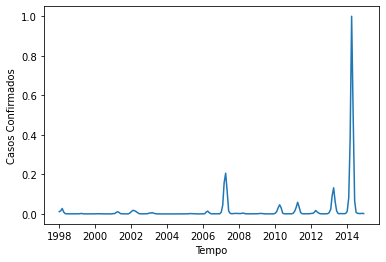

In [15]:
#dados1["casos-confirmados"] = np.log10(dados1["casos-confirmados"])

plt.plot(dados8['data'], dados8['casos_min_max_abs'])
plt.xlabel('Tempo')
plt.ylabel('Casos Confirmados')
plt.show()

#plt.bar(dados1['data'],dados1['casos-confirmados'])